<a href="https://colab.research.google.com/github/jabedkhanjb/Machine-Learning/blob/main/Stock_Price_Prediction_with_LSTM_(Jb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description:
This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
# importing the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [2]:
# Get the stock quote
df = pd.read_csv("/content/Dhaka Stock Exchange Broad Historical Data.csv")
# show the data
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 21, 2020","5,100.73","5,088.87","5,100.73","5,088.87",-,0.23%
1,"Sep 20, 2020","5,088.87","5,104.65","5,131.05","5,083.33",-,-0.31%
2,"Sep 17, 2020","5,104.65","5,116.81","5,134.89","5,098.06",-,-0.24%
3,"Sep 16, 2020","5,116.81","5,100.54","5,128.40","5,100.54",-,0.32%
4,"Sep 15, 2020","5,100.54","5,092.14","5,101.66","5,074.35",-,0.16%
...,...,...,...,...,...,...,...
1800,"Feb 05, 2013","4,191.50","4,191.50","4,191.50","4,191.50",-,0.65%
1801,"Feb 04, 2013","4,164.62","4,164.62","4,164.62","4,164.62",-,0.02%
1802,"Feb 03, 2013","4,163.82","4,163.82","4,163.82","4,163.82",-,0.67%
1803,"Jan 31, 2013","4,136.30","4,136.30","4,136.30","4,136.30",-,0.23%


In [3]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [4]:
df[["Date"]]

,Date
0,"Sep 21, 2020"
1,"Sep 20, 2020"
2,"Sep 17, 2020"
3,"Sep 16, 2020"
4,"Sep 15, 2020"
...,...
1800,"Feb 05, 2013"
1801,"Feb 04, 2013"
1802,"Feb 03, 2013"
1803,"Jan 31, 2013"


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")

In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-09-21,"5,100.73","5,088.87","5,100.73","5,088.87",-,0.23%
1,2020-09-20,"5,088.87","5,104.65","5,131.05","5,083.33",-,-0.31%
2,2020-09-17,"5,104.65","5,116.81","5,134.89","5,098.06",-,-0.24%
3,2020-09-16,"5,116.81","5,100.54","5,128.40","5,100.54",-,0.32%
4,2020-09-15,"5,100.54","5,092.14","5,101.66","5,074.35",-,0.16%
...,...,...,...,...,...,...,...
1800,2013-02-05,"4,191.50","4,191.50","4,191.50","4,191.50",-,0.65%
1801,2013-02-04,"4,164.62","4,164.62","4,164.62","4,164.62",-,0.02%
1802,2013-02-03,"4,163.82","4,163.82","4,163.82","4,163.82",-,0.67%
1803,2013-01-31,"4,136.30","4,136.30","4,136.30","4,136.30",-,0.23%


In [7]:
# get the number of rows and columns in the data set
df.shape

(1805, 7)

In [8]:
df[["Date"]]

,Date
0,2020-09-21
1,2020-09-20
2,2020-09-17
3,2020-09-16
4,2020-09-15
...,...
1800,2013-02-05
1801,2013-02-04
1802,2013-02-03
1803,2013-01-31


In [9]:
print(type(df["Price"]))

<class 'pandas.core.series.Series'>


In [10]:
# Define a function to remove commas from a number
def remove_commas(number):
    if isinstance(number, str):
        return number.replace(',', '')
    else:
        return number

# Apply the function to the 'price', 'Open', 'High', and 'Low' columns
df['Price'] = df['Price'].apply(remove_commas)
df['Open'] = df['Open'].apply(remove_commas)
df['High'] = df['High'].apply(remove_commas)
df['Low'] = df['Low'].apply(remove_commas)

# Convert the columns to numeric
df['Price'] = pd.to_numeric(df['Price'])
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])




In [11]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-09-21,5100.73,5088.87,5100.73,5088.87,-,0.23%
1,2020-09-20,5088.87,5104.65,5131.05,5083.33,-,-0.31%
2,2020-09-17,5104.65,5116.81,5134.89,5098.06,-,-0.24%
3,2020-09-16,5116.81,5100.54,5128.40,5100.54,-,0.32%
4,2020-09-15,5100.54,5092.14,5101.66,5074.35,-,0.16%
...,...,...,...,...,...,...,...
1800,2013-02-05,4191.50,4191.50,4191.50,4191.50,-,0.65%
1801,2013-02-04,4164.62,4164.62,4164.62,4164.62,-,0.02%
1802,2013-02-03,4163.82,4163.82,4163.82,4163.82,-,0.67%
1803,2013-01-31,4136.30,4136.30,4136.30,4136.30,-,0.23%


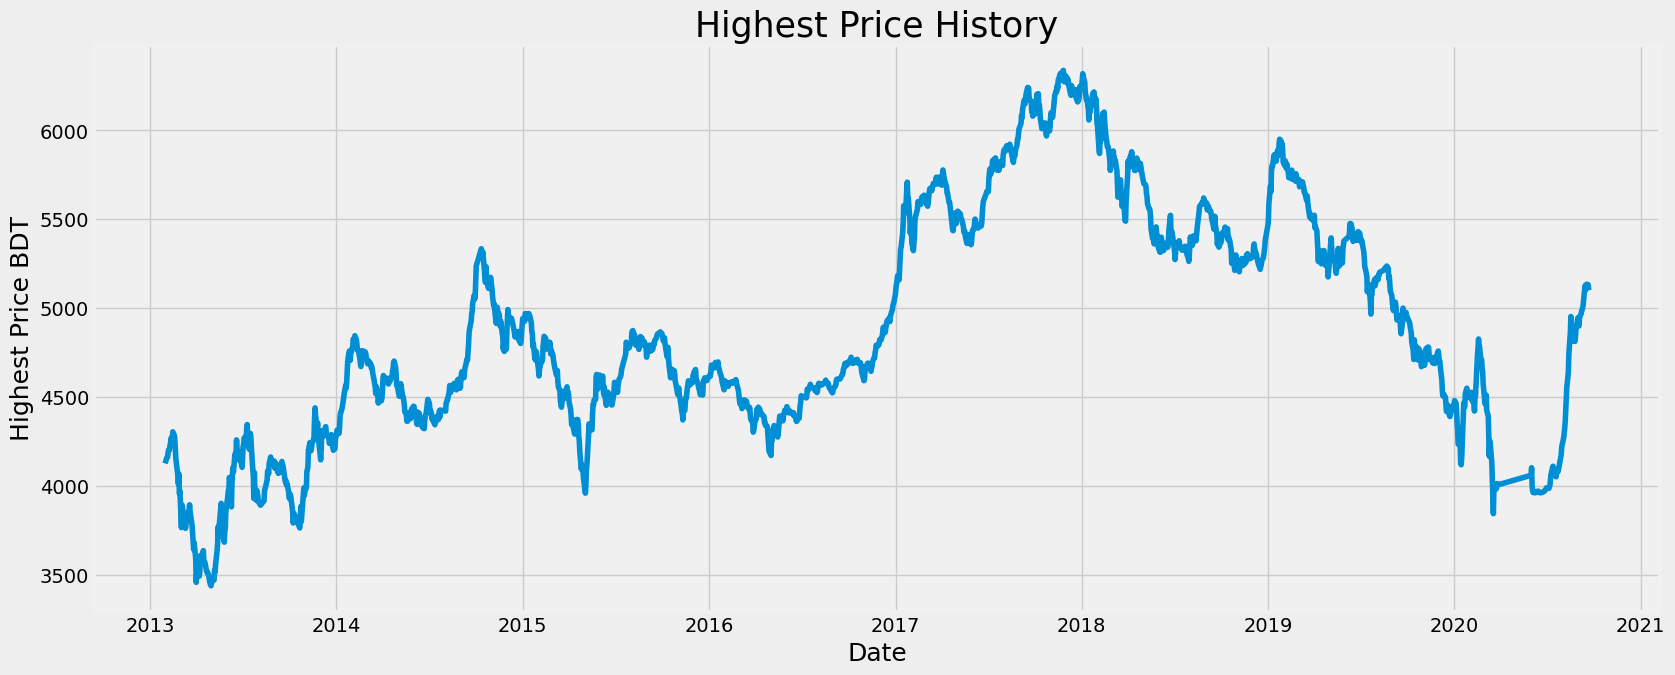

In [12]:
# Visualize the highest price history
plt.figure(figsize=(18,7), facecolor="#eeeeee")
plt.title("Highest Price History", fontsize=25)
plt.plot(df["Date"], df["High"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Highest Price BDT", fontsize=18)
plt.show()

In [13]:
# create a new dataframe with only the "Highest Column"
data = df.filter(["High"])

# convert the dataframe into numpy array
dataset = data.values

# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1444

In [14]:
df.shape

(1805, 7)

In [15]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.57344573],
       [0.58390816],
       [0.58523321],
       ...,
       [0.25014924],
       [0.240653  ],
       [0.23735762]])

In [16]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.57344573, 0.58390816, 0.58523321, 0.58299373, 0.57376665,
       0.5825693 , 0.57525388, 0.54438421, 0.53860779, 0.53538142,
       0.53290039, 0.52762777, 0.52042968, 0.50419084, 0.50750693,
       0.52029165, 0.49876639, 0.48290712, 0.47409066, 0.47479115,
       0.48677187, 0.47645782, 0.48555723, 0.4742908 , 0.52241726,
       0.49165111, 0.44885593, 0.41431475, 0.39375222, 0.3858847 ,
       0.32072229, 0.3067954 , 0.29742339, 0.28804792, 0.26901404,
       0.25437286, 0.24911059, 0.24409677, 0.23856535, 0.22176405,
       0.22413811, 0.22358255, 0.21907253, 0.21154317, 0.21837895,
       0.22407255, 0.22671921, 0.23201598, 0.22907601, 0.21543898,
       0.20665358, 0.1949006 , 0.19293717, 0.18904137, 0.18985228,
       0.19000756, 0.18777498, 0.18538711, 0.18334432, 0.18200546])]
[0.18163278686261863]

[array([0.57344573, 0.58390816, 0.58523321, 0.58299373, 0.57376665,
       0.5825693 , 0.57525388, 0.54438421, 0.53860779, 0.53538142,
       0.53290039, 0.52762777, 0.52

In [17]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [18]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1384, 60, 1)

## Build the LSTM Model

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model


In [21]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1384/1384 [==============================] - 27s 17ms/step - loss: 0.0026


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1354 to 1805
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

print("Train data size: ",len(train_data))
print("Test data size: ",len(test_data))

for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])


Train data size:  1444
Test data size:  421


In [23]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [24]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [25]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 10ms/step


In [26]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

55.45298949857167

<ipython-input-27-bde321af7acb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


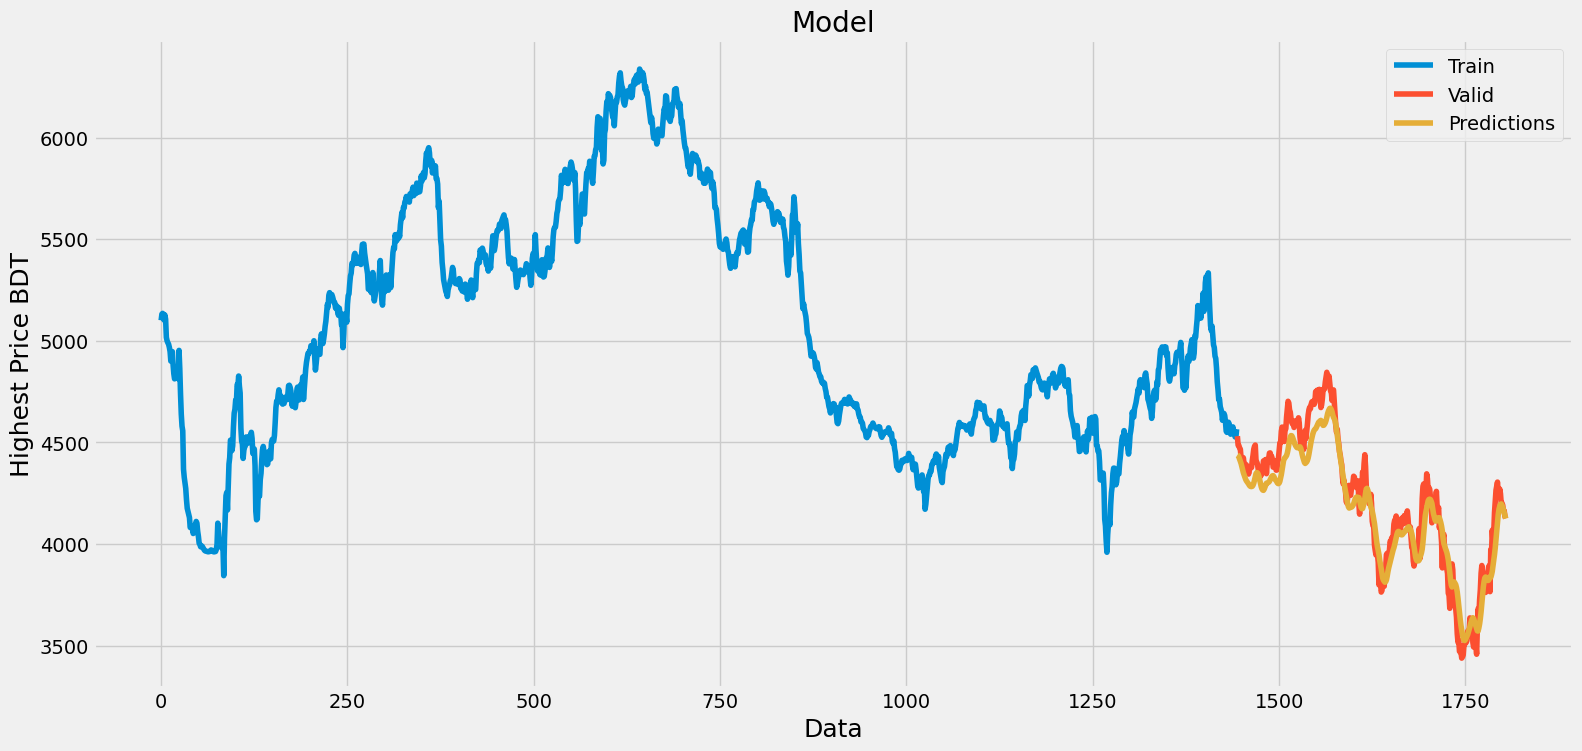

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

# Visualize the data
plt.figure(figsize=(17, 8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Highest Price BDT', fontsize=18)
plt.plot(train['High'])
plt.plot(valid[['High', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid

,High,Predictions
1444,4530.83,4438.212891
1445,4486.19,4435.829590
1446,4484.90,4428.035645
1447,4472.17,4418.247559
1448,4467.00,4407.157227
...,...,...
1800,4191.50,4181.252441
1801,4164.62,4169.068848
1802,4163.82,4154.465332
1803,4136.30,4140.367676


In [29]:
# Get the data
newdf = df
newdf

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-09-21,5100.73,5088.87,5100.73,5088.87,-,0.23%
1,2020-09-20,5088.87,5104.65,5131.05,5083.33,-,-0.31%
2,2020-09-17,5104.65,5116.81,5134.89,5098.06,-,-0.24%
3,2020-09-16,5116.81,5100.54,5128.40,5100.54,-,0.32%
4,2020-09-15,5100.54,5092.14,5101.66,5074.35,-,0.16%
...,...,...,...,...,...,...,...
1800,2013-02-05,4191.50,4191.50,4191.50,4191.50,-,0.65%
1801,2013-02-04,4164.62,4164.62,4164.62,4164.62,-,0.02%
1802,2013-02-03,4163.82,4163.82,4163.82,4163.82,-,0.67%
1803,2013-01-31,4136.30,4136.30,4136.30,4136.30,-,0.23%


In [30]:
# Create a new dataframe
newdf = newdf.filter(["High"])
newdf

,High
0,5100.73
1,5131.05
2,5134.89
3,5128.40
4,5101.66
...,...
1800,4191.50
1801,4164.62
1802,4163.82
1803,4136.30


In [31]:
# Get the last 60 days highest price values and convert the dataframe into an array
last_60_days = newdf[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print("Predicted Price:", pred_price)

1/1 [==============================] - 0s 20ms/step
Predicted Price: [[4110.961]]


In [32]:
import pandas as pd

# Assuming your dataset is named df and contains 'Date' and 'Price' columns

# Prompt the user for the start and end dates
start_date_input = input("Enter the start date (YYYY-MM-DD): ")
end_date_input = input("Enter the end date (YYYY-MM-DD): ")

# Convert the user input to pandas datetime format
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)

# Filter the dataset based on the date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the prices within the specified date range
print(filtered_df['Price'])


Enter the start date (YYYY-MM-DD): 2019-2-22
Enter the end date (YYYY-MM-DD): 2019-2-24
339    5714.27
Name: Price, dtype: float64
